In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import io
import re
import matplotlib.lines as lines

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
filename = "/content/juan.xlsx"
tabla = pd.read_excel( filename)
tabla.head()

,Peso,Talla,Tiempo de Gestación,Número de Consultas Prenatales,APGAR1,Edad de la Madre,Edad del Padre,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,3.615,51,42,9,9.0,18,26,NaN,0.620321,NaN,1,NaN
1,3.860,53,42,4,10.0,19,22,NaN,NaN,NaN,NaN,NaN
2,3.450,49,41,9,9.0,20,27,NaN,NaN,NaN,NaN,NaN
3,3.600,51,41,8,8.0,19,20,NaN,NaN,NaN,NaN,NaN
4,3.780,51,41,8,9.0,23,22,NaN,NaN,NaN,NaN,NaN


In [ ]:
X, Y, Z = tabla["Peso"], tabla["Tiempo de Gestación"], tabla["Edad de la Madre"]  # La variable regresora, la variable respuesta
print(X.head(3))
print(Y.head(3))
print(Z.head(3))

0    3.615
1    3.860
2    3.450
Name: Peso, dtype: float64
0    42
1    42
2    41
Name: Tiempo de Gestación, dtype: int64
0    18
1    19
2    20
Name: Edad de la Madre, dtype: int64


In [ ]:
sin_atipicos = tabla[(tabla["Peso"] < 6000) & (tabla["Tiempo de Gestación"] < 80)]
print(sin_atipicos.head())
tabla1 = pd.concat([sin_atipicos["Peso"], sin_atipicos["Tiempo de Gestación"],  sin_atipicos["Edad de la Madre"]], axis = 1)
print(tabla1.head())

    Peso  Talla  Tiempo de Gestación  Número de Consultas Prenatales  APGAR1  \
0  3.615     51                   42                               9     9.0   
1  3.860     53                   42                               4    10.0   
2  3.450     49                   41                               9     9.0   
3  3.600     51                   41                               8     8.0   
4  3.780     51                   41                               8     9.0   

   Edad de la Madre  Edad del Padre  Unnamed: 7  Unnamed: 8  Unnamed: 9  \
0                18              26         NaN    0.620321         NaN   
1                19              22         NaN         NaN         NaN   
2                20              27         NaN         NaN         NaN   
3                19              20         NaN         NaN         NaN   
4                23              22         NaN         NaN         NaN   

  Unnamed: 10 Unnamed: 11  
0           1         NaN  
1         Na

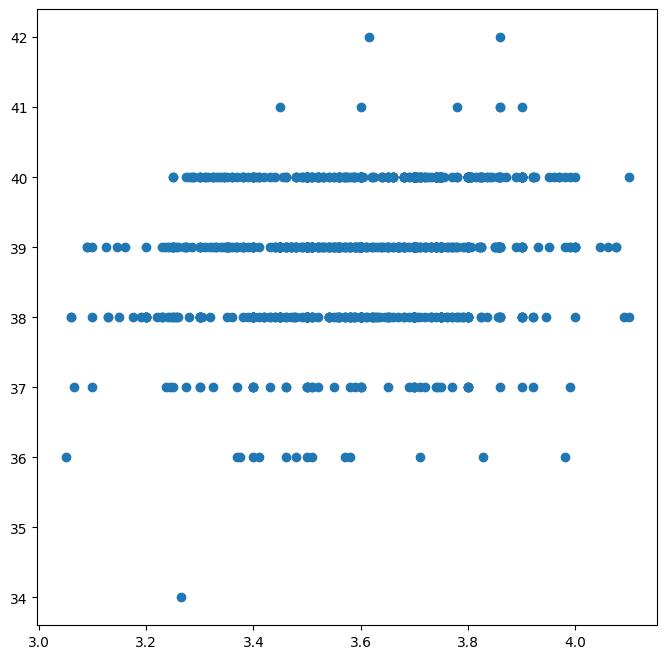

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.scatter(tabla1["Peso"], tabla1["Tiempo de Gestación"])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split # Acá vamos a seleccionar los datos de entrenamiento y de prueba
x_train, x_test, y_train, y_test, z_train, z_test= train_test_split(tabla1["Peso"], tabla1["Tiempo de Gestación"], tabla1["Edad de la Madre"], test_size = 0.3)
 # Escogemos el 30% de los datos para prueba
print(x_train, y_train, z_train)
yz_train = pd.concat([y_train, z_train], axis=1)
print(yz_train)
yz_test = pd.concat([y_test, z_test], axis=1)


753    3.60
82     3.53
37     3.40
220    3.80
847    3.90
       ... 
669    3.40
311    3.35
765    3.60
687    3.45
78     3.52
Name: Peso, Length: 644, dtype: float64 753    38
82     40
37     40
220    40
847    38
       ..
669    38
311    39
765    38
687    38
78     40
Name: Tiempo de Gestación, Length: 644, dtype: int64 753    15
82     25
37     20
220    25
847    20
       ..
669    32
311    24
765    33
687    31
78     41
Name: Edad de la Madre, Length: 644, dtype: int64
     Tiempo de Gestación  Edad de la Madre
753                   38                15
82                    40                25
37                    40                20
220                   40                25
847                   38                20
..                   ...               ...
669                   38                32
311                   39                24
765                   38                33
687                   38                31
78                    40        

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(yz_train, x_train)

LinearRegression()

In [ ]:
print("El intercepto del modelo es: ", modelo.intercept_)
print("Coeficiente:", list(zip(yz_train, modelo.coef_.flatten(), )))

El intercepto del modelo es:  2.294902691037379
Coeficiente: [('Tiempo de Gestación', 0.034093373014353764), ('Edad de la Madre', -0.0006089242661307613)]


In [ ]:
print("Coeficiente de determinación R^2:", modelo.score(yz_test, x_test))

Coeficiente de determinación R^2: 0.055301706888888136


In [ ]:
from sklearn.metrics import mean_squared_error
predicciones = modelo.predict(yz_test)
print(predicciones)
rmse = mean_squared_error(y_true  = x_test, y_pred  = predicciones, squared = True)
print("El cuadrado medio del error es: ", rmse)

[3.54296116 3.57827238 3.64219666 3.60932113 3.60688543 3.60871221
 3.60871221 3.6135836  3.57644561 3.64097881 3.64950375 3.60505866
 3.57461883 3.61419253 3.64706805 3.57949023 3.6434145  3.64463235
 3.61236575 3.57096529 3.53748084 3.60749436 3.64463235 3.57340099
 3.6111479  3.6111479  3.54539686 3.60810328 3.64524128 3.6458502
 3.60323189 3.63915204 3.61297468 3.57340099 3.64280558 3.54783255
 3.57400991 3.60993006 3.5788813  3.64463235 3.61297468 3.6111479
 3.56852959 3.57644561 3.60932113 3.63793419 3.60444974 3.60749436
 3.6458502  3.64889482 3.50034285 3.61236575 3.60932113 3.60932113
 3.57400991 3.581317   3.6111479  3.61053898 3.60810328 3.64524128
 3.6434145  3.60810328 3.57522776 3.61236575 3.61236575 3.6482859
 3.57461883 3.64036988 3.60871221 3.60871221 3.60749436 3.57340099
 3.60323189 3.57400991 3.57340099 3.60688543 3.61236575 3.60688543
 3.581317   3.63671634 3.64645913 3.57522776 3.64645913 3.6160193
 3.54296116 3.5788813  3.43885427 3.54052546 3.64097881 3.60932113

In [ ]:
modelo.predict(yz_train)

array([3.581317  , 3.6434145 , 3.64645913, 3.6434145 , 3.57827238,
       3.60323189, 3.6135836 , 3.58070808, 3.61175683, 3.57827238,
       3.59896942, 3.57949023, 3.60079619, 3.5788813 , 3.64524128,
       3.63793419, 3.60505866, 3.6111479 , 3.57400991, 3.64889482,
       3.57400991, 3.61236575, 3.60932113, 3.60749436, 3.6111479 ,
       3.60566759, 3.64097881, 3.58009915, 3.6135836 , 3.60993006,
       3.6434145 , 3.60140512, 3.61297468, 3.6135836 , 3.64950375,
       3.60201404, 3.6111479 , 3.57583668, 3.57400991, 3.60688543,
       3.64706805, 3.5788813 , 3.6160193 , 3.60201404, 3.61297468,
       3.61175683, 3.56913852, 3.57218314, 3.6111479 , 3.64097881,
       3.5788813 , 3.60932113, 3.60444974, 3.53869869, 3.63976096,
       3.57827238, 3.60566759, 3.6458502 , 3.57400991, 3.64767697,
       3.57827238, 3.64158773, 3.60505866, 3.60810328, 3.6111479 ,
       3.6458502 , 3.57644561, 3.56670282, 3.64645913, 3.57461883,
       3.57705453, 3.63732526, 3.60871221, 3.61419253, 3.64219

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
X = tabla1[["Tiempo de Gestación", "Edad de la Madre"]]
Y = tabla1["Peso"]
X_train, X_test, Y_train, Y_test = train_test_split(
                                        X,
                                        Y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


In [ ]:
modelo1 = sm.OLS(endog=Y_train, exog=X_train, dummy_endog=True)
modelo1 = modelo1.fit()
print(modelo1.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          1.242e+05
Date:                Mon, 11 Dec 2023   Prob (F-statistic):                        0.00
Time:                        15:23:17   Log-Likelihood:                          156.09
No. Observations:                 736   AIC:                                     -308.2
Df Residuals:                     734   BIC:                                     -299.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['dummy_endog']
  warnings.warn(msg, ValueWarning)


In [ ]:
intervalos_ci = modelo1.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
Tiempo de Gestación,0.090872,0.093906
Edad de la Madre,-0.002014,0.002528


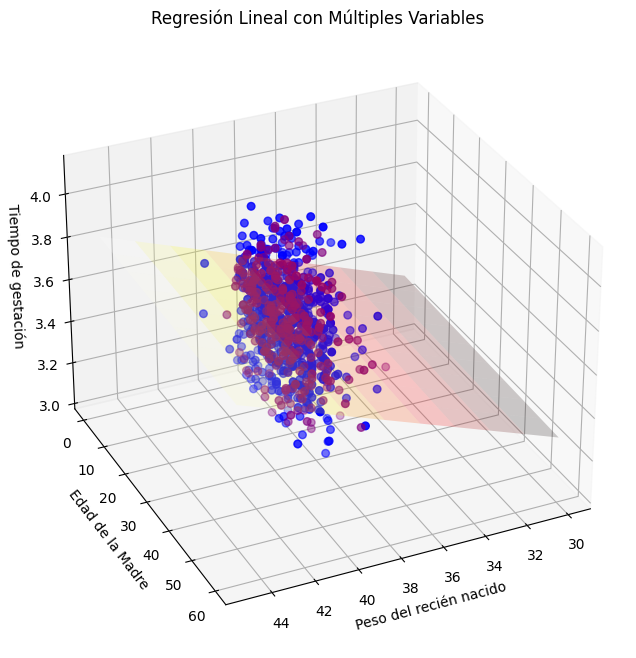

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sb
import matplotlib.pyplot as plt

fig = plt.figure(figsize=((10,8)))
ax = fig.add_subplot(projection='3d')
xx, yy = np.meshgrid(np.linspace(30, 45, num=10),
                     np.linspace(0, 60, num=10))
nuevoX = (modelo.coef_[0] * xx)
nuevoY = (modelo.coef_[1] * yy)

x = (nuevoX + nuevoY + modelo.intercept_)
ax.plot_surface(xx, yy, x, alpha=0.2, cmap='hot')
ax.scatter(yz_train["Tiempo de Gestación"], yz_train["Edad de la Madre"], x_train, c='blue',s=30)
ax.scatter(yz_test["Tiempo de Gestación"], yz_test["Edad de la Madre"], x_test, c='purple',s=30)
ax.view_init(elev=30., azim=65)

ax.set_xlabel('Peso del recién nacido')
ax.set_ylabel('Edad de la Madre')
ax.set_zlabel('Tiempo de gestación')
ax.set_title('Regresión Lineal con Múltiples Variables')

plt.show()

In [ ]:
yz_test = pd.concat([y_test, z_test], axis=1)
r2 = modelo.score(yz_test, x_test)
r2


0.055301706888888136